In [1]:
#Importing necessary libraries

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

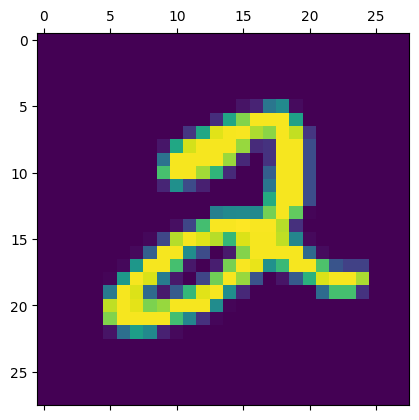

In [23]:
plt.matshow(X_train[5])

In [24]:
y_train[5]

np.uint8(2)

In [25]:
y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [26]:
X_train.shape

(60000, 28, 28)

In [37]:
X_train = X_train/255
X_test = X_test/255

X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [42]:
#Convert or Flatten the 2D array, using reshape in pandas - to cobert to a 1D array
# (60000, 28,28) ----> Convert to -----> (60000,784)
X_train_flattened  = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [43]:
 X_test_flattened = X_test.reshape(len(X_test),28*28)

In [44]:
X_test_flattened[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [45]:
#Lets Create a SIMPLE NEURAL NETWORK
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
    ]
)
#Optimizers allow us to train efficiently when backward propagation and training is going on
#Output class is categories -
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
model.fit(X_train_flattened,y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8172 - loss: 0.7060
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9133 - loss: 0.3122
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9223 - loss: 0.2790
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9242 - loss: 0.2699
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9258 - loss: 0.2593


In [46]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9157 - loss: 0.2997


[0.26467055082321167, 0.9254999756813049]

In [47]:
model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.30850447e-02, 2.66546124e-07, 5.80320880e-02, ...,
        9.99817491e-01, 9.22116712e-02, 6.70162141e-01],
       [5.46700537e-01, 5.65774180e-03, 9.99357224e-01, ...,
        1.42670207e-12, 1.24953844e-01, 4.41417303e-09],
       [3.49566166e-04, 9.92826164e-01, 6.54995501e-01, ...,
        1.56603143e-01, 3.76880556e-01, 4.46515046e-02],
       ...,
       [3.43477609e-06, 2.74163153e-06, 1.10393274e-03, ...,
        2.93108851e-01, 5.08073926e-01, 7.87090540e-01],
       [1.47520914e-04, 1.60431024e-04, 1.05723659e-04, ...,
        5.63251415e-05, 5.66916108e-01, 1.19750235e-04],
       [1.10142222e-02, 3.50676072e-10, 1.88401714e-01, ...,
        3.31204895e-08, 2.18473549e-04, 1.41126634e-06]], dtype=float32)

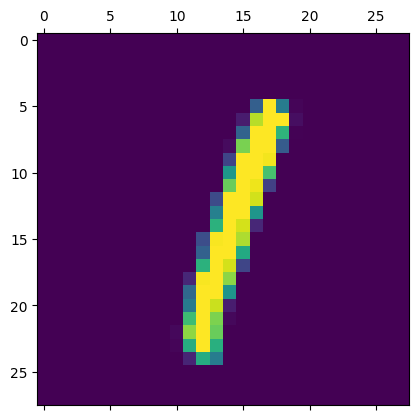

In [58]:
plt.matshow(X_test[5])

In [53]:
y_pred = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step


In [54]:
 y_pred[0]

array([2.3085045e-02, 2.6654612e-07, 5.8032088e-02, 9.5431709e-01,
       1.9295233e-03, 9.7019292e-02, 8.7481459e-07, 9.9981749e-01,
       9.2211671e-02, 6.7016214e-01], dtype=float32)

In [57]:
int(np.argmax(y_pred[5]))

1

In [63]:
y_predicted_lables = [np.argmax(i) for i in y_pred]
y_predicted_lables[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [64]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [65]:
cm =tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   6,    9,  917,   19,   12,    3,   12,   11,   39,    4],
       [   3,    0,   17,  922,    0,   24,    2,   12,   20,   10],
       [   1,    1,    2,    1,  909,    0,   12,    5,    9,   42],
       [  10,    3,    4,   30,   12,  782,   14,    5,   26,    6],
       [  11,    3,    6,    1,    7,   15,  912,    2,    1,    0],
       [   1,    6,   22,    7,    5,    0,    0,  958,    1,   28],
       [   8,    8,    6,   26,    9,   30,    9,   14,  855,    9],
       [  11,    7,    1,    9,   22,    7,    0,   24,    5,  923]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

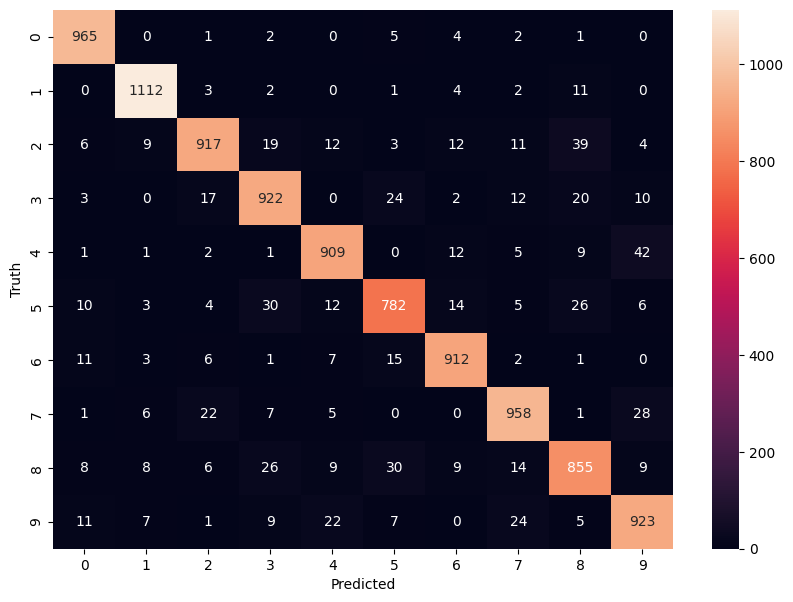

In [66]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [67]:
#Lets Create a SIMPLE NEURAL NETWORK
model = keras.Sequential(
    [
        keras.layers.Dense(100, input_shape=(784,), activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ]
)
#Optimizers allow us to train efficiently when backward propagation and training is going on
#Output class is categories -
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
model.fit(X_train_flattened,y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8763 - loss: 0.4547
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9600 - loss: 0.1375
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9738 - loss: 0.0873
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9805 - loss: 0.0675
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9832 - loss: 0.0527


In [68]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9718 - loss: 0.0884


[0.07530588656663895, 0.9753999710083008]

In [69]:
modelpred = model.predict(X_test_flattened)
modelpred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.6974953e-03, 5.0891769e-05, 4.5418543e-01, ..., 9.9997622e-01,
        1.1296794e-01, 6.6200189e-02],
       [1.1168714e-01, 9.9564612e-01, 9.9999881e-01, ..., 1.3636400e-08,
        5.0084557e-02, 2.2649769e-05],
       [5.2678061e-04, 9.9879622e-01, 3.1181782e-01, ..., 7.7485092e-02,
        4.7204420e-01, 4.5120372e-03],
       ...,
       [3.5743039e-06, 6.4192450e-04, 7.4893476e-05, ..., 3.4927168e-01,
        8.1450218e-01, 9.4720674e-01],
       [2.1263037e-02, 3.4709093e-03, 5.0670027e-05, ..., 1.6394963e-03,
        9.8423254e-01, 1.2241643e-04],
       [6.3953632e-01, 4.6563487e-06, 7.2999579e-01, ..., 3.0626927e-06,
        3.0417103e-04, 3.9005272e-02]], dtype=float32)

np.int64(2)

In [71]:
modelpred_lables = [np.argmax(i) for i in modelpred]
modelpred_lables[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [72]:
cm =tf.math.confusion_matrix(labels=y_test, predictions=modelpred_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    0,    1,    0,    2,    2,    4,    1],
       [   0, 1126,    2,    1,    0,    0,    3,    0,    3,    0],
       [   2,    1, 1015,    0,    1,    0,    1,    6,    5,    1],
       [   1,    0,   12,  968,    1,   14,    0,    6,    7,    1],
       [   0,    1,    7,    0,  950,    0,    7,    2,    1,   14],
       [   2,    1,    0,    4,    1,  870,    9,    1,    2,    2],
       [   6,    3,    1,    1,    3,    1,  943,    0,    0,    0],
       [   0,    7,   14,    1,    0,    1,    0,  993,    3,    9],
       [   8,    1,    4,    1,    2,    2,    6,    2,  946,    2],
       [   2,    5,    1,    3,    8,    3,    0,    6,    7,  974]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

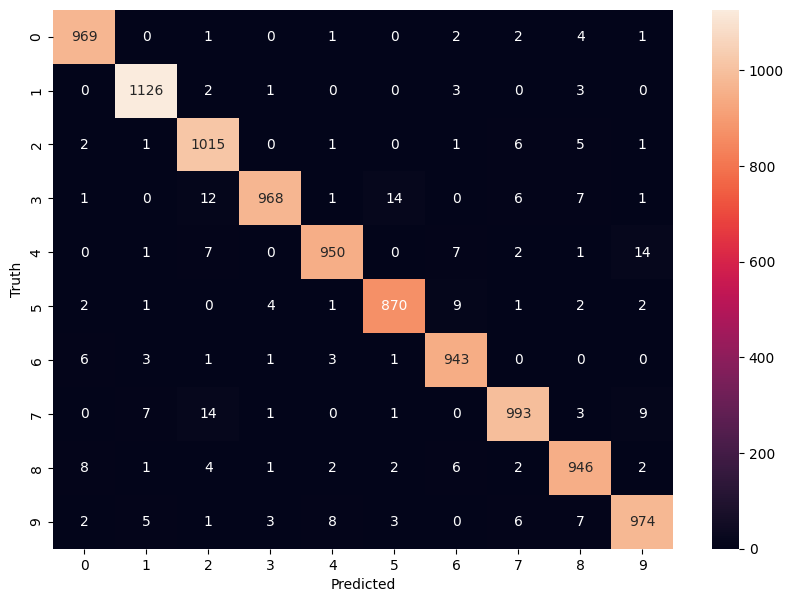

In [73]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
#Lets Create a SIMPLE NEURAL NETWORK
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ]
)
#Optimizers allow us to train efficiently when backward propagation and training is going on
#Output class is categories -
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
model.fit(X_train,y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8639 - loss: 0.4493
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9652 - loss: 0.1133
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9758 - loss: 0.0780
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9815 - loss: 0.0590
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9848 - loss: 0.0460


In [78]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9701 - loss: 0.0999


[0.0872674286365509, 0.9742000102996826]

In [80]:
predmod = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [81]:
predmod

array([[1.97582849e-04, 2.14130491e-01, 3.98339897e-01, ...,
        9.99995112e-01, 5.07223725e-01, 8.66471767e-01],
       [2.00536940e-02, 8.64042163e-01, 9.99999940e-01, ...,
        1.17511870e-02, 1.03076582e-03, 1.95939901e-06],
       [2.46127732e-02, 9.99925375e-01, 1.87934831e-01, ...,
        3.70868534e-01, 2.50884533e-01, 2.22691633e-02],
       ...,
       [1.39399385e-03, 4.16119024e-03, 4.29724157e-03, ...,
        1.11878820e-01, 1.37315512e-01, 3.30809474e-01],
       [3.51672590e-01, 7.14804628e-05, 2.60158908e-04, ...,
        2.57010077e-04, 9.77603078e-01, 5.20302565e-05],
       [2.93652527e-02, 5.95597085e-03, 4.59159550e-04, ...,
        1.10058586e-07, 5.56499287e-02, 1.59461648e-04]], dtype=float32)

In [85]:
predmod_lables = [np.argmax(i) for i in predmod]
predmod_lables[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [88]:
cm =tf.math.confusion_matrix(labels=y_test, predictions=predmod_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    1,    0,    1,    1,    2,    5,    1,    2,    1],
       [   0, 1124,    4,    1,    0,    0,    2,    0,    4,    0],
       [   7,    2,  991,    7,    5,    1,    5,    6,    8,    0],
       [   0,    0,    3,  978,    0,   14,    0,    8,    5,    2],
       [   2,    0,    0,    0,  957,    0,    5,    5,    2,   11],
       [   5,    0,    0,    2,    1,  863,   11,    2,    5,    3],
       [   2,    2,    0,    0,    6,    4,  939,    1,    4,    0],
       [   0,    1,    9,    1,    1,    0,    0, 1011,    1,    4],
       [   4,    0,    3,    5,    2,    5,    4,    4,  945,    2],
       [   3,    2,    1,    6,    5,    3,    0,   10,   11,  968]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

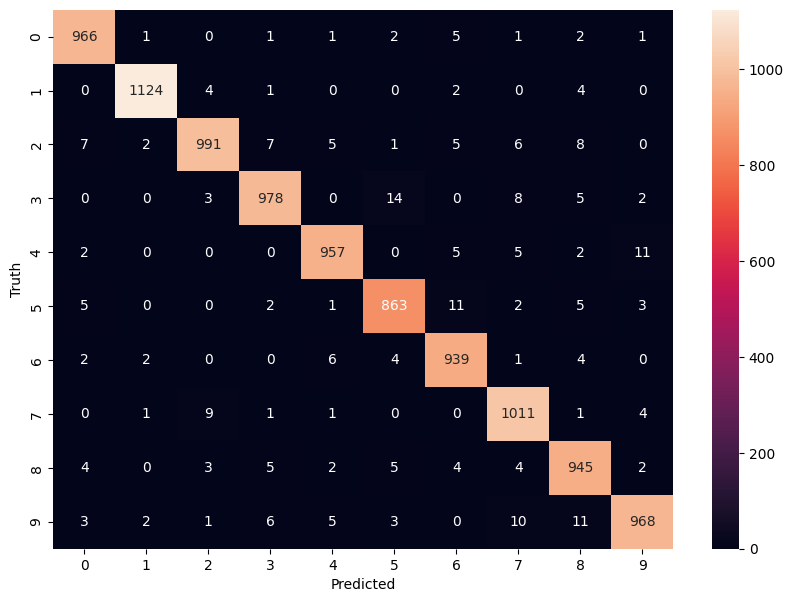

In [89]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')